# Notebook for the post splitting exploratory data analysis:

In [3]:
from pathlib import Path
import pandas as pd
import seaborn as sns
# import os
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import umap

In [7]:
data_split_dir = Path.cwd().parent / "data" / "split"
data_prepared_dir = Path.cwd().parent / "data" / "prepared"


In [15]:
# Explore the original data sets:
eda_dict={'dataset':[],'size':[],'positive_class_ratio':[],'positive_count':[],'negative_count':[],'null_values':[]}

for dataset_path in data_prepared_dir.iterdir():
    df=pd.read_csv(dataset_path)
    
    y_name = [c for c in df.columns if "labels-" in c][0]
    df.rename(columns= {y_name: y_name.replace("labels-", "")}, inplace =True)
    y_name = y_name.replace("labels-", "")

    pos_class=df[y_name].value_counts()[1]
    neg_class=df[y_name].value_counts()[0]
    
    eda_dict['dataset'].append(dataset_path.name[:-4])
    
    eda_dict['positive_class_ratio'].append(round(pos_class/(pos_class+neg_class)*100,2))
    eda_dict['positive_count'].append(pos_class)
    eda_dict['negative_count'].append(neg_class)
    eda_dict['null_values'].append(df[[y_name,"smiles"]].isna().sum())
    eda_dict['size'].append(pos_class+neg_class)
    
    #print(df.shape)
pd.DataFrame(eda_dict)


,dataset,size,positive_class_ratio,positive_count,negative_count,null_values
0,bace,1513,66.89,1012,501,active 0 smiles 0 dtype: int64
1,clintox,1484,7.55,112,1372,CT_TOX 0 smiles 0 dtype: int64
2,HIV,41127,3.51,1443,39684,HIV_active 0 smiles 0 dtype: int64
3,lipophilicity,4200,96.55,4055,145,drug_like 0 smiles 0 dtype: int64
4,sol_del,1128,16.40,185,943,binned_sol 0 smiles 0 dtype: int64
5,tox21,6549,11.73,768,5781,NR-AhR 1282 smiles 0 dtype: int64


In [20]:
# Check the size and class balance of each dataset after splitting:
class_balance={'dataset':[],'positive':[],'negative':[],'split_type':[],'purpose':[]}
# files=[path.name for path in data_path.iterdir()]

for dataset_path in data_split_dir.iterdir():
    dataset_name, split_type, data_set_type = tuple(dataset_path.name.split("-"))

    df= pd.read_csv(dataset_path)
    
    class_balance['dataset'].append(dataset_name)
    class_balance['positive'].append(df["labels"].value_counts()[1])
    class_balance['negative'].append(df["labels"].value_counts()[0])
    class_balance['split_type'].append(split_type)
    class_balance['purpose'].append(data_set_type[:-4])

In [21]:
# come up with a way to visualize this?
pd.DataFrame(class_balance).groupby(['dataset','split_type','purpose']).sum()

positive  negative
dataset       split_type purpose                     
HIV           cluster    train         1213     33745
                         validate       230      5939
              random     train         1213     33744
                         validate       230      5940
bace          cluster    train          845       442
                         validate       167        59
              random     train          856       430
                         validate       156        71
clintox       cluster    train          105      1152
                         validate         7       214
              random     train          104      1152
                         validate         8       214
lipophilicity cluster    train         3448       122
                         validate       607        23
              random     train         3447       123
                         validate       608        22
sol_del       cluster    train          146       813
                         validate        39       130
              random     train          153       805
                         validate        32       138
tox21         cluster    train          623      4944
                         validate       145       837
              random     train          649      4917
                         validate       119       864

# Visualize Chemical Space for the various datasets:
Note: chemical space is a somewhat arbitrary concept in that it is relative to the data being shown. In this instance the umap coordinates don't really mean anything outside of each indvidiual plot. These plots are mean to illustrate the relative clustering of the chemical structures with respect to the classes present in the data.

In [22]:
def generate_fingerprint(smiles,radius,bits):
    try:
        mol=Chem.MolFromSmiles(smiles)
        fp=AllChem.GetMorganFingerprintAsBitVect(mol,radius,bits)
        return(np.array(fp))
    except:
        print(f'{smiles} failed in RDkit')
        return (np.nan)
    

bace.csv


c:\Users\phili\anaconda3\envs\chem39\lib\site-packages\umap\umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


clintox.csv
[NH4][Pt]([NH4])(Cl)Cl failed in RDkit


[18:26:51] Explicit valence for atom # 0 N, 5, is greater than permitted
[18:26:51] Can't kekulize mol.  Unkekulized atoms: 9


c1ccc(cc1)n2c(=O)c(c(=O)n2c3ccccc3)CCS(=O)c4ccccc4 failed in RDkit


[18:26:51] Explicit valence for atom # 10 N, 4, is greater than permitted
[18:26:51] Explicit valence for atom # 10 N, 4, is greater than permitted
[18:26:52] Can't kekulize mol.  Unkekulized atoms: 4
[18:26:52] Can't kekulize mol.  Unkekulized atoms: 4


Cc1cc2c(cc1C)N3C=N2[Co+]456(N7=C8[C@H](C(C7=CC9=N4C(=C(C1=N5[C@@]([C@@H]2N6C(=C8C)[C@@]([C@H]2CC(=O)N)(CCC(=O)NC[C@H](OP(=O)(O[C@@H]2[C@H](O[C@H]3[C@@H]2O)CO)[O-])C)C)([C@@]([C@@H]1CCC(=O)N)(C)CC(=O)N)C)C)[C@@]([C@@H]9CCC(=O)N)(C)CC(=O)N)(C)C)CCC(=O)N)O failed in RDkit
Cc1cc2c(cc1C)N3C=N2[Co]456(N7=C8[C@H](C(C7=CC9=N4C(=C(C1=N5[C@@]([C@@H]2N6C(=C8C)[C@@]([C@H]2CC(=O)N)(CCC(=O)NC[C@H](OP(=O)(O[C@@H]2[C@H](O[C@H]3[C@@H]2O)CO)O)C)C)([C@@]([C@@H]1CCC(=O)N)(C)CC(=O)N)C)C)[C@@]([C@@H]9CCC(=O)N)(C)CC(=O)N)(C)C)CCC(=O)N)C#N failed in RDkit
CCCCc1c(=O)n(n(c1=O)c2ccc(cc2)O)c3ccccc3 failed in RDkit
CCCCc1c(=O)n(n(c1=O)c2ccccc2)c3ccccc3 failed in RDkit


c:\Users\phili\anaconda3\envs\chem39\lib\site-packages\umap\umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


HIV.csv


[18:27:25] WARNING: not removing hydrogen atom without neighbors
[18:27:25] WARNING: not removing hydrogen atom without neighbors
c:\Users\phili\anaconda3\envs\chem39\lib\site-packages\umap\umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


lipophilicity.csv


c:\Users\phili\anaconda3\envs\chem39\lib\site-packages\umap\umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


sol_del.csv


c:\Users\phili\anaconda3\envs\chem39\lib\site-packages\umap\umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


tox21.csv


[18:28:22] WARNING: not removing hydrogen atom without neighbors
c:\Users\phili\anaconda3\envs\chem39\lib\site-packages\umap\umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
c:\Users\phili\anaconda3\envs\chem39\lib\site-packages\pynndescent\pynndescent_.py:906: UserWarning: Failed to correctly find n_neighbors for some samples.Results may be less than ideal. Try re-running withdifferent parameters.
  warn(
c:\Users\phili\anaconda3\envs\chem39\lib\site-packages\umap\umap_.py:125: UserWarning: A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 190 edges.
It has only fully disconnected 5 vertices.
Use umap.utils.disconnected_vertices() to identify them.
  warn(


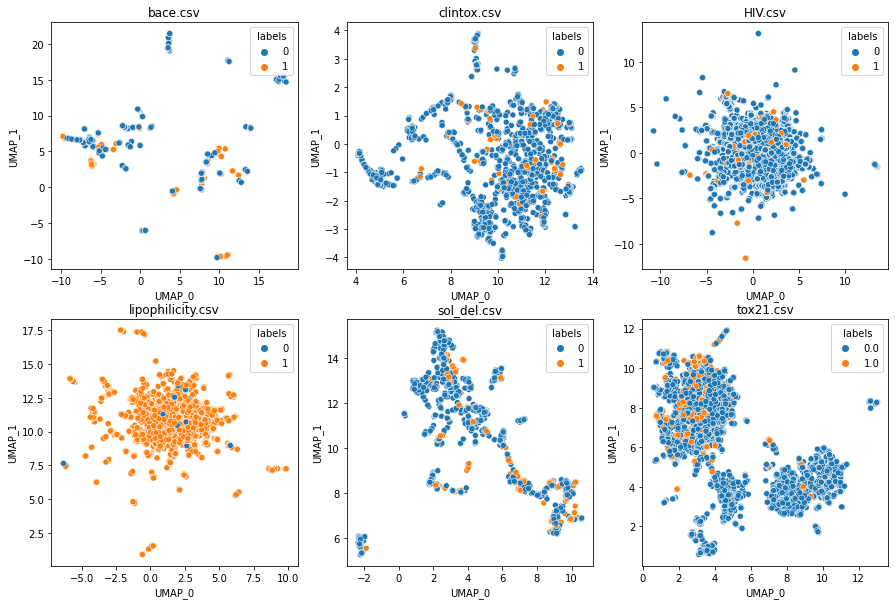

In [23]:
# look at a break down of 2D chemical space for each dataset:
# chemical space Umapping adapted from: https://blog.reverielabs.com/mapping-chemical-space-with-umap/
fig, axes = plt.subplots(2,3,figsize=(15,10))

umap_model = umap.UMAP(metric = "jaccard",
                      n_neighbors = 25,
                      n_components = 2,
                      low_memory = True,
                      min_dist = 0.001)

row=0
col=0

for dataset_path in data_prepared_dir.iterdir():
        # Read DataFrame:
        print(dataset_path.name)
        df=pd.read_csv(dataset_path)
        
        # Generate the morgan finger prints and drop any rows that don't convert to a mol, or those that don't have a target value
        radius=2
        bits=1024
        
        axes[row,col].set_title(dataset_path.name)
        
        df['fp'] = df['smiles'].apply(lambda x: generate_fingerprint(x,radius,bits))
        df.dropna(subset=['fp',"labels"],inplace=True)
        
        #get the umap coords:
        X_umap = umap_model.fit_transform(df['fp'].to_list())
        df["UMAP_0"], df["UMAP_1"] = X_umap[:,0], X_umap[:,1]
        
        sns.scatterplot(data=df,x='UMAP_0',y='UMAP_1',hue="labels",ax=axes[row,col])
        
        if col>1:
            row+=1
            col=0
        else:
            col+=1

In [73]:
# Explore similarity between different clusters/datasets?
#perhaps look at pairwise tannimoto/jaccard between them?